# Problem Statement: In this project, we are asked to combine historical usage patterns with weather data in order to under stand hourly bike rental demand

# Data description:
#--->Variable	Definition
#--->datetime	hourly date + timestamp
#--->season	Type of season (1 = spring, 2 = summer, 3 = fall, 4 = winter)
#--->holiday	whether the day is considered a holiday
#--->workingday	whether the day is neither a weekend nor holiday
#--->weathr: 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
#--->temp	temperature in Celsius
#--->atemp	"feels like" temperature in Celsius
#--->humidity	relative humidity
#--->windspeed	wind speed
#--->casual	number of non-registered user rentals initiated
#--->registered	number of registered user rentals initiated
#--->count	number of total rentals

In [1]:
import numpy as np
import pandas as pd

In [2]:
#importing libraries

In [3]:
#importing visualization libraries

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
#Loading data

In [7]:
rawdata= pd.read_csv(r"D:\Database\Database for Practise\bike_hourly.csv")

In [8]:
rawdata.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [9]:
rawdata.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
data1=rawdata.copy()

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
# as col[instant] is an index---> we will drop it
data1.drop(['instant'],axis=1,inplace=True)

In [13]:
data1.head(2)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


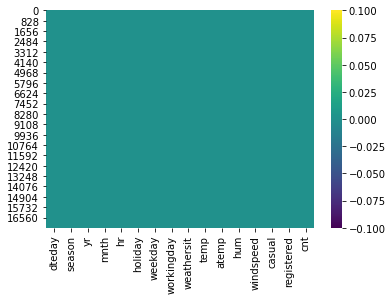

In [14]:
#missing value Identification
data1.isnull().sum()
sns.heatmap(data1.isnull(),cmap='viridis')

In [15]:
#EDA analysis

In [16]:
import datetime

In [17]:
print(data1['dteday'].dtype)

object


In [18]:
data1['dteday']=pd.to_datetime(data1['dteday'])

In [19]:
data1['Year']=data1['dteday'].dt.year

In [20]:
data1.head(2)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Year
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011


In [21]:
data1['Year'].max()

2012

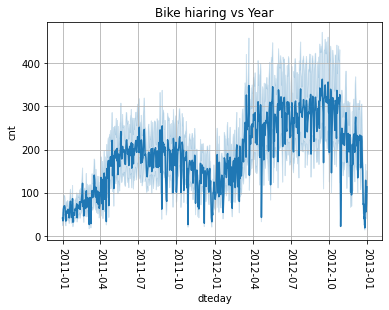

In [22]:
sns.lineplot(x=data1['dteday'], y="cnt", data=data1).set_title('Bike hiaring vs Year')
plt.xticks(rotation=270)
plt.grid(True)
plt.show()

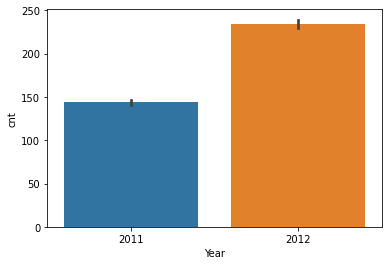

In [23]:
sns.barplot(x='Year',y='cnt',data=data1)

In [24]:
seson={1:'spring',2:'summer',3:'fall',4:'winter'}

In [25]:
data1['seasonname']=data1['season'].map(seson)

In [26]:
type1={1:'Clear, Few clouds, Partly cloudy, Partly cloudy', 2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds' ,4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}
data1['Weather type']=data1['weathersit'].map(type1)

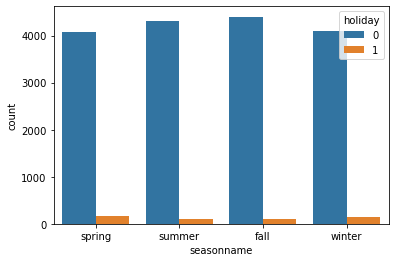

In [27]:
sns.countplot(x='seasonname',hue='holiday',data=data1)

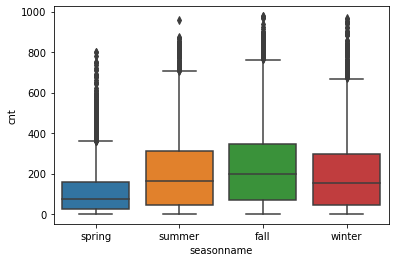

In [28]:
sns.boxplot(x='seasonname',y='cnt',data=data1)

In [29]:
month={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [30]:
data1['Month']=data1['mnth'].map(month)

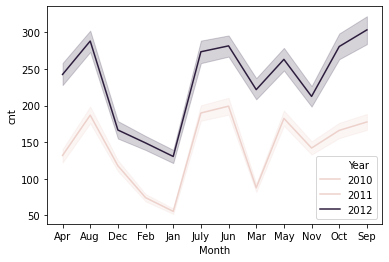

In [31]:
sns.lineplot(x='Month',y='cnt',hue='Year',data=data1)

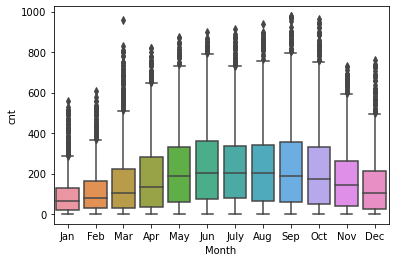

In [32]:
sns.boxplot(x='Month',y='cnt',data=data1)

Text(0.5, 1.0, 'Season type vs Count on hourly basis')

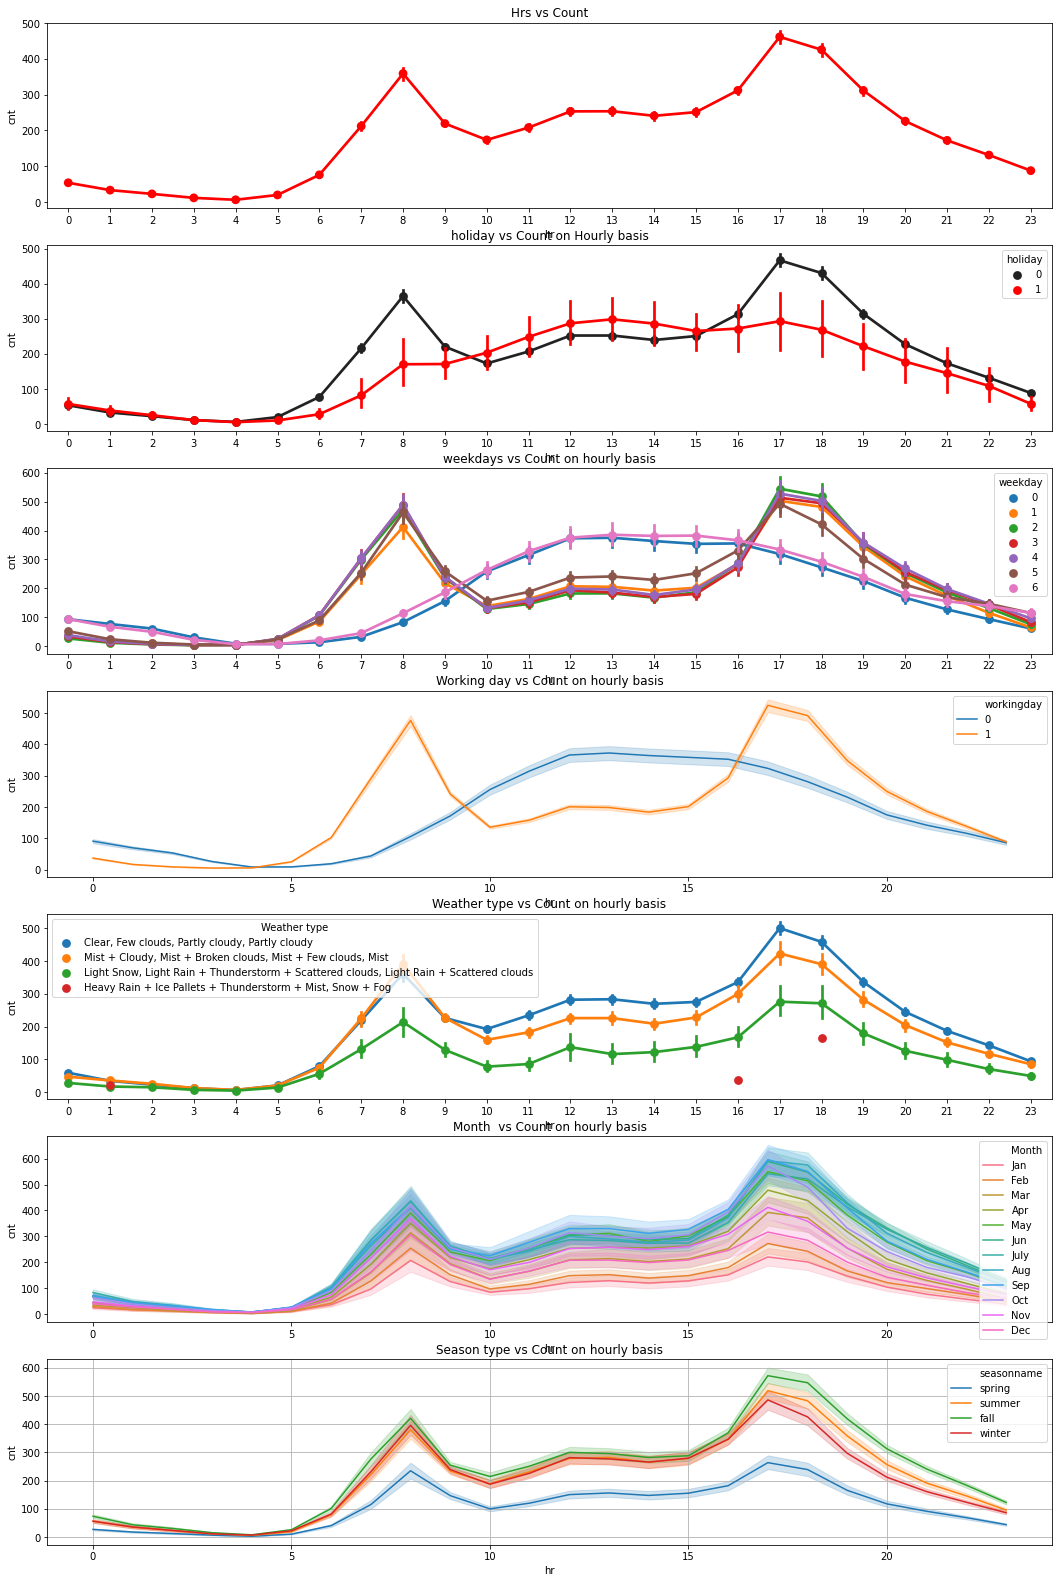

In [33]:
fig,(b1,b2,b3,b4,b5,b6,b7)=plt.subplots(nrows=7)
fig.set_size_inches(18,28)
plt.grid(True)

sns.pointplot(x=data1['hr'],y='cnt',data=data1,ax=b1,color='red').set_title('Hrs vs Count')
sns.pointplot(x=data1['hr'],y='cnt',data=data1,ax=b2,hue='holiday',color='red').set_title('holiday vs Count on Hourly basis')
sns.pointplot(x=data1['hr'],y='cnt',data=data1,ax=b3,hue='weekday').set_title('weekdays vs Count on hourly basis')
sns.lineplot(x=data1['hr'],y='cnt',data=data1,ax=b4,hue='workingday',color='red').set_title('Working day vs Count on hourly basis')
sns.pointplot(x=data1['hr'],y='cnt',data=data1,ax=b5,hue='Weather type').set_title('Weather type vs Count on hourly basis')
sns.lineplot(x=data1['hr'],y='cnt',data=data1,ax=b6,hue='Month').set_title('Month  vs Count on hourly basis')
sns.lineplot(x=data1['hr'],y='cnt',data=data1,ax=b7,hue='seasonname').set_title('Season type vs Count on hourly basis')



Text(0.5, 1.0, 'weekdays and season vs count')

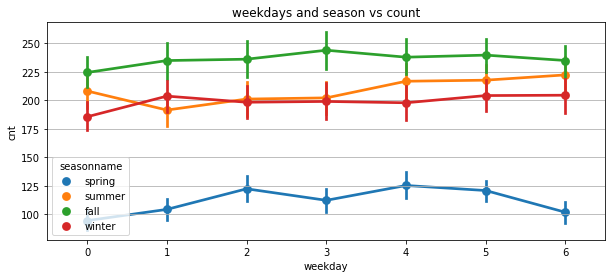

In [34]:
plt.figure(figsize=(10,4))
plt.set_cmap(cmap='BrBG')
plt.grid(True)
sns.pointplot(x='weekday',y='cnt',hue='seasonname',data=data1).set_title('weekdays and season vs count')


Text(0.5, 1.0, 'Season vs count')

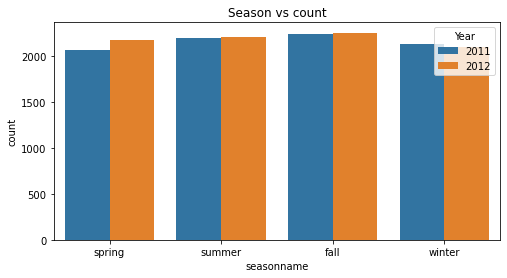

In [35]:
plt.figure(figsize=(8,4))
sns.countplot(x='seasonname',hue='Year',data=data1).set_title('Season vs count')

In [36]:
data1[['holiday','mnth','atemp','cnt','hum','windspeed',]].corr()


,holiday,mnth,atemp,cnt,hum,windspeed
holiday,1.000000,0.018430,-0.030973,-0.030927,-0.010588,0.003988
mnth,0.018430,1.000000,0.208096,0.120638,0.164411,-0.135386
atemp,-0.030973,0.208096,1.000000,0.400929,-0.051918,-0.062336
cnt,-0.030927,0.120638,0.400929,1.000000,-0.322911,0.093234
hum,-0.010588,0.164411,-0.051918,-0.322911,1.000000,-0.290105
windspeed,0.003988,-0.135386,-0.062336,0.093234,-0.290105,1.000000


Text(0.5, 1.0, 'Heatmap corelation')

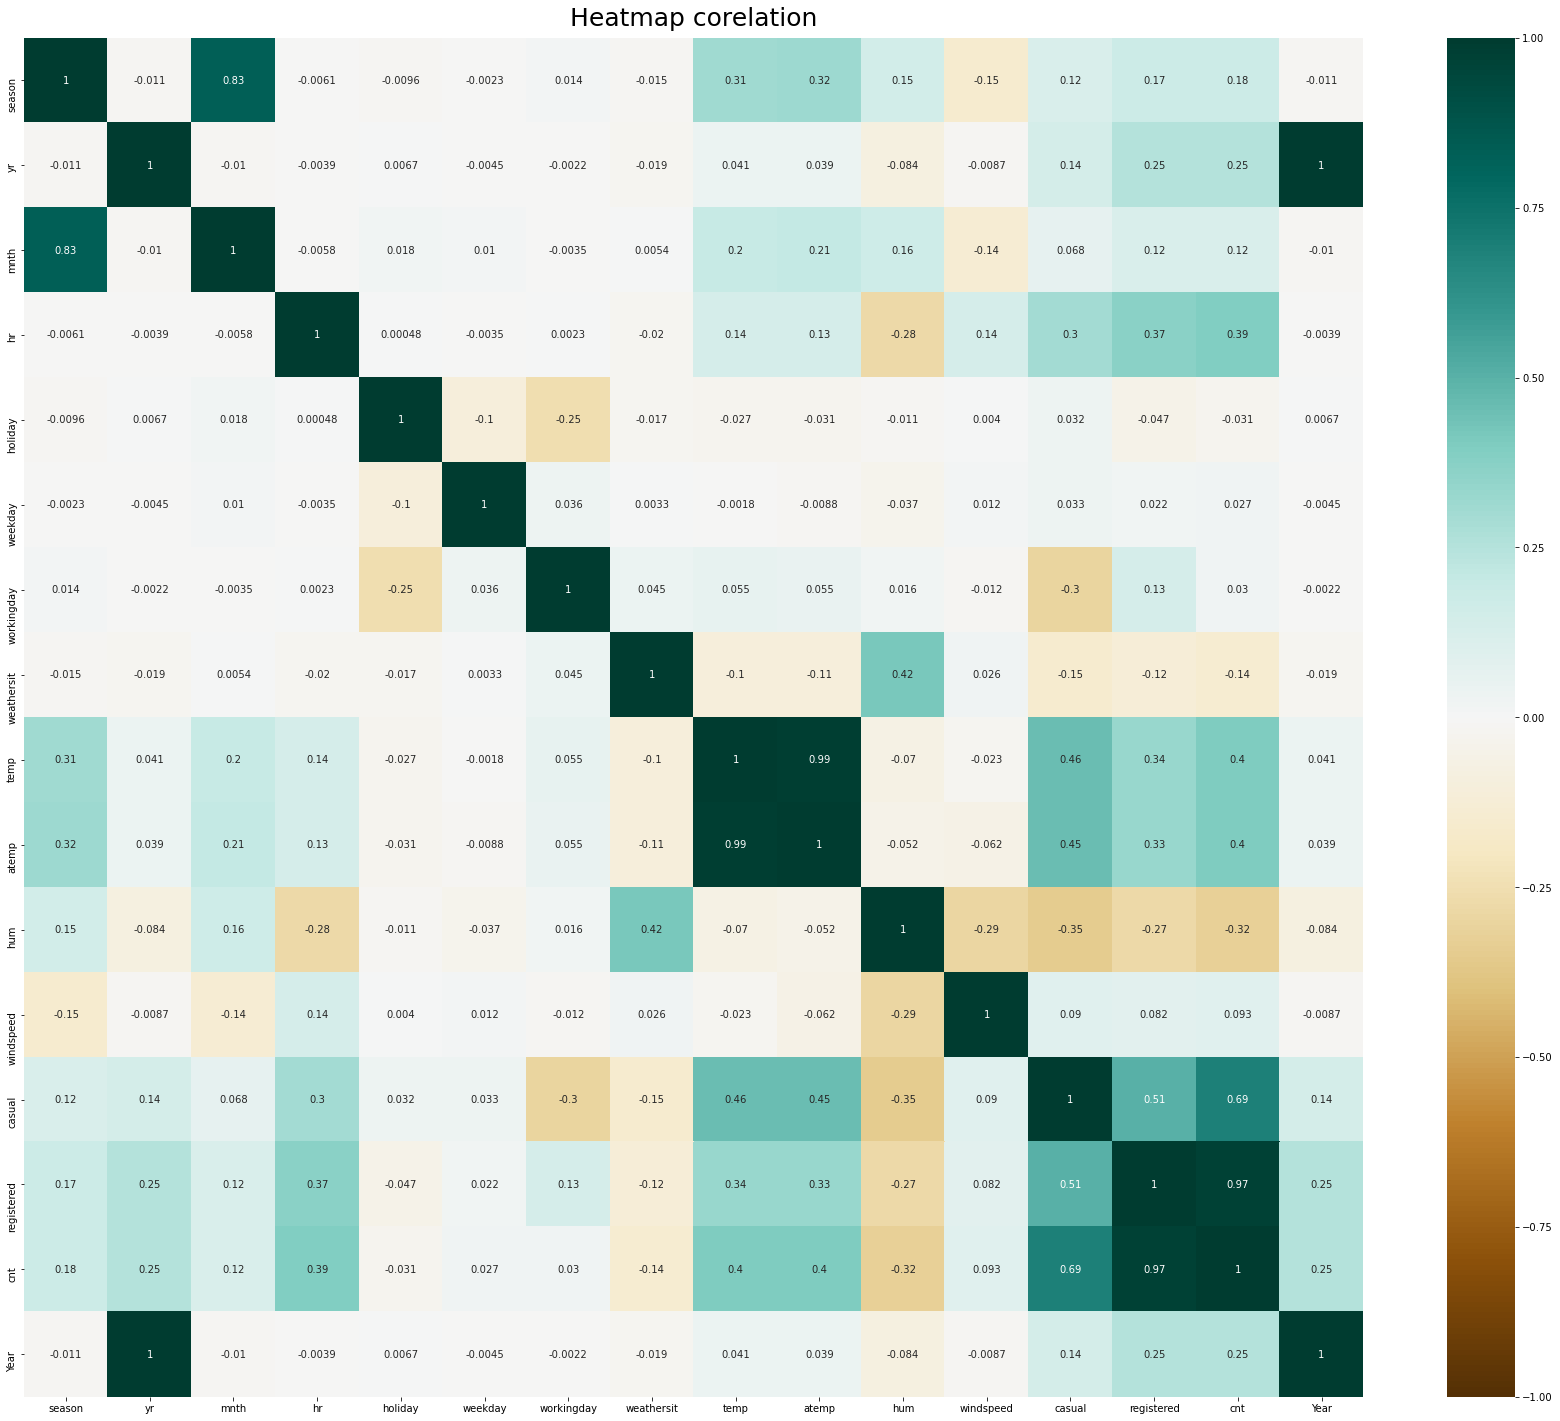

In [37]:
plt.figure(figsize=(30,25))
heatmap=sns.heatmap(data1.corr(),annot=True,vmax=1,vmin=-1,cmap='BrBG')
heatmap.set_title('Heatmap corelation',fontdict={'fontsize':25}, pad=12)

In [38]:
#Working on humidity
dhum=data1.copy()

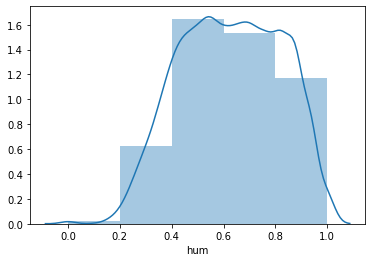

In [39]:
sns.distplot(dhum['hum'],bins=5)

In [40]:
for humid in dhum.index:
    if  (dhum.loc[humid]['hum']>=.00) & (dhum.loc[humid]['hum']<=.20):
        dhum.loc[humid,'hum_category']=1
    elif (dhum.loc[humid]['hum']>.20) & (dhum.loc[humid]['hum']<=.40):
        dhum.loc[humid,'hum_category']=2
    elif (dhum.loc[humid]['hum']>.40) & (dhum.loc[humid]['hum']<=.60):
        dhum.loc[humid,'hum_category']=3
    elif (dhum.loc[humid]['hum']>.60) & (dhum.loc[humid]['hum']<=.80):
        dhum.loc[humid,'hum_category']=4
    elif (dhum.loc[humid]['hum']>.80) :
        dhum.loc[humid,'hum_category']=5
    

In [41]:
hum_dict={1:'0 to .20',2:'.21 to .40',3:'.41 to .60',4:'.61 to .80',5:'.81 and above'}

In [42]:
dhum['hum_category']=dhum['hum_category'].map(hum_dict)

In [43]:
for w_speed in dhum.index:
    if  (dhum.loc[w_speed]['windspeed']>=.00) & (dhum.loc[w_speed]['windspeed']<=.20):
        dhum.loc[w_speed,'windspeed_category']=1
    elif (dhum.loc[w_speed]['windspeed']>.20) & (dhum.loc[w_speed]['windspeed']<=.40):
        dhum.loc[w_speed,'windspeed_category']=2
    elif (dhum.loc[w_speed]['windspeed']>.40) & (dhum.loc[w_speed]['windspeed']<=.60):
        dhum.loc[w_speed,'windspeed_category']=3
    elif (dhum.loc[w_speed]['windspeed']>.60) & (dhum.loc[w_speed]['windspeed']<=.80):
        dhum.loc[w_speed,'windspeed_category']=4
    elif (dhum.loc[w_speed]['windspeed']>.80) :
        dhum.loc[w_speed,'windspeed_category']=5

In [44]:
w_speed_dict={1:'0 to .20',2:'.21 to .40',3:'.41 to .60',4:'.61 to .80',5:'.81 and above'}

In [45]:
dhum['windspeed_category']=dhum['windspeed_category'].map(w_speed_dict)

Text(0.5, 1.0, 'Humidity vs Count')

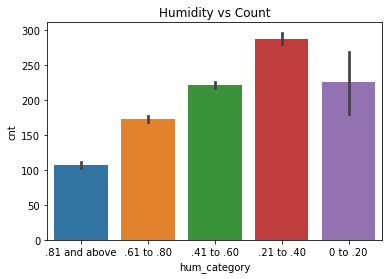

In [46]:
sns.barplot(x='hum_category',y='cnt',data=dhum).set_title('Humidity vs Count')

Text(0.5, 1.0, 'Windspeed vs Count')

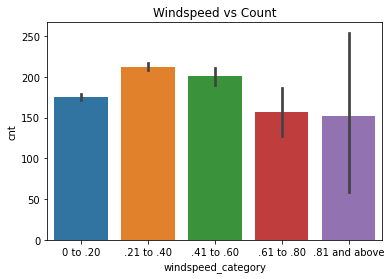

In [47]:
sns.barplot(x='windspeed_category',y='cnt',data=dhum).set_title('Windspeed vs Count')

# Summary:
1. Growth can be seen on the year 2012 respect to 2011 on bike hireing.
2. June, July, Aug, Sep this four months showing very good amount of growth,might be due to the good weather condition
3. In weekdays 7Hrs-9Hrs and 16Hrs-19Hrs no if bike hireing is maximum--->as this the office time.
4. On weekend balanced trend can be observed on bike hireing, genereally it's between Morning 8Hrs- Evening 8 Hrs
5. Prefarable seasons for bike hiaring are as follows: Fall,Summer,Winter
6. There is straight deep in bike hiaring can be observed in Spring.
7. Highly humid condition also shows less bike hiaring tendency: probably due to the higher chance of rain.
   